In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
# Reading the File:
df = pd.read_csv("/content/seeds.csv")

In [5]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
# Size
df.size

1592

In [7]:
# Shape
df.shape

(199, 8)

In [9]:
# Data Types
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [10]:
df.head

<bound method NDFrame.head of       Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699          4.8

In [11]:
df.describe

<bound method NDFrame.describe of       Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699         

In [13]:
df["Type"].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([65. , 65.3, 65.6, 65.9, 66.2, 66.5, 66.8, 67.1, 67.4, 67.7, 68. ]),
 <a list of 10 Patch objects>)

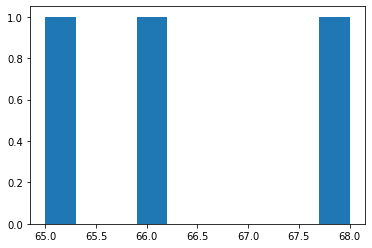

In [15]:
hist_data = df["Type"].value_counts()
plt.hist(hist_data)

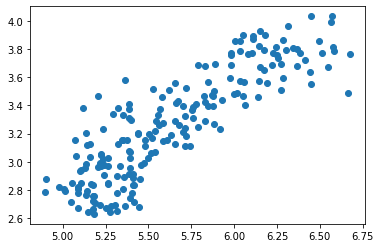

In [22]:
plt.scatter(df["Kernel.Length"], df["Kernel.Width"])
# You can also use plt.plot(kind = 'scatter', x = 'Kernel.Length', y = 'Kernel.Width')

# Inference for Scatter Plot above:
## Kernel Length and Width are correlated. Here when Kernel Length increases, Kernel Width also increases.

### => Hence there is a Positive Correlation.

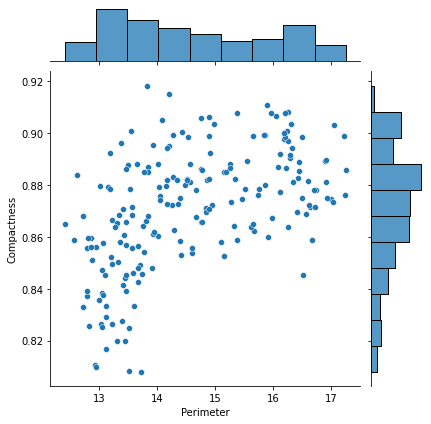

In [21]:
sns.jointplot(x = df['Perimeter'], y = df['Compactness'])

# Inference for Joint Plot above:
## There exists no correlation between the two entities
### => Hence Perimeter and Correlation are unrelated.

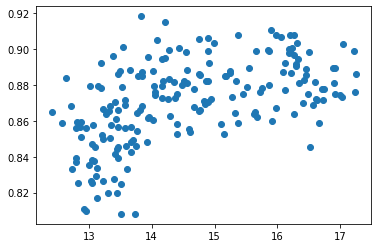

In [20]:
plt.scatter(df["Perimeter"], df["Compactness"])

# Scatter plot to compare Perimeter and Compactness.
## Different type have different colours as shown below:

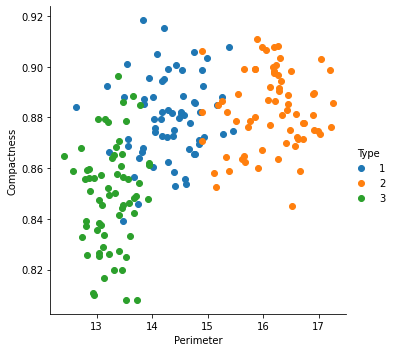

In [23]:
sns.FacetGrid(df, hue = 'Type', height = 5).map(plt.scatter, "Perimeter", "Compactness").add_legend()

# Box plot to understand correlation between compactness and type:

## Observation:
  1) We have compared compactness with 3 types given in the dataset.

  2) For Type 1: there exist points which exist outside the lower and upper whiskers and hence this type contains outliers.

  3) Medians are varying.
  
  4) Type 1 is more concentrated, i.e. it has minimum IQR.

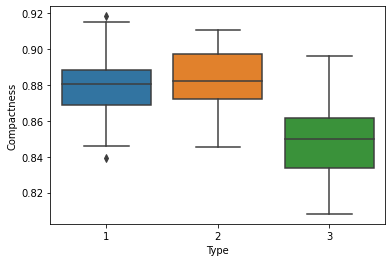

In [26]:
sns.boxplot(x = 'Type', y = 'Compactness', data = df)

# Strip plot to understand correlation between compactness and type:

## Observation:
  1) The points lying inside the box are in the IQR.

  2) The points lying above and below the box but within the respective whiskers are the First and Third Quartiles.
  
  3) Whereas the points which lie outside the whiskers indicate the outlier points.

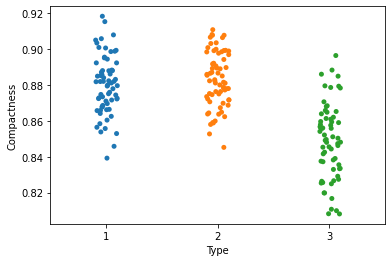

In [27]:
sns.stripplot(x = 'Type', y = 'Compactness', jitter = True, data = df)

# Plotting both box and strip plots to see the points and the range of the Types and Compactness clearly.

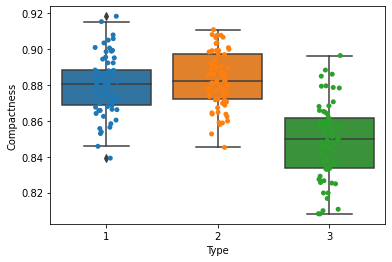

In [28]:
sns.boxplot(x = 'Type', y = 'Compactness', data = df)
sns.stripplot(x = 'Type', y = 'Compactness', jitter = True, data = df)

# Plotting both box and strip plots to see the points and the range of the Types and Perimeter clearly.

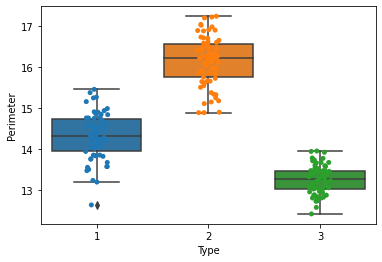

In [29]:
sns.boxplot(x = 'Type', y = 'Perimeter', data = df)
sns.stripplot(x = 'Type', y = 'Perimeter', jitter = True, data = df)

# Plotting both Violin and strip plots to see the points and the range of the Types and Perimeter clearly.

## Observation:
  1) The greather the IQR of the Type, the longer is the shape of the violin.
  
  2) It tells the distribution of the sample.

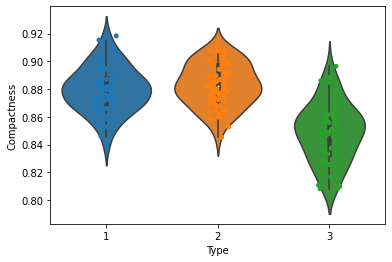

In [31]:
sns.violinplot(x = 'Type', y = 'Compactness', data = df)
sns.stripplot(x = 'Type', y = 'Compactness', jitter = True, data = df)

# Kernel Density Estimation plots to understand correlation between compactness and type.
## Inference:

  1) Reference to Gaussian Distribution.

  2) Type 3 is separable.

  3) Type 1 and 2 are overlapping.

  4) Deviation for Type 3 along x axis is more unlike Type 1 and 2.

  5) Greater the deviation, greater is the IQR.

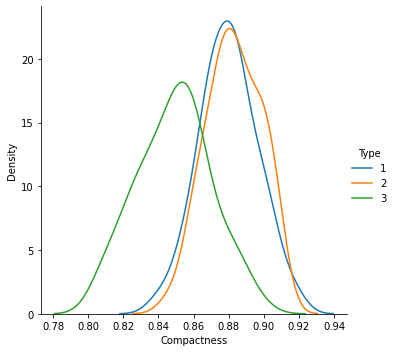

In [32]:
sns.FacetGrid(df, hue = "Type", height = 5).map(sns.kdeplot, 'Compactness').add_legend()

# Pair plot to understand all characteristics with type being the main parameter. 

## Inference:

  1) Diagonal kind is mentioned as histogram and hence all features with themselves.
  
  2) If Diagonal kind is not mentioned, we see only KDE being plotted.

  3) The parameters which are correlated with other entities/parameters include:
  
  {(Area, Perimeter ), (Area, Compactness), (Area, Length), (Area, Width), (Area, Asymmetry Coeff), (Area, Kernel,Grove)}, etc.

Uncorrelated Entities include:

  {(Asymmetry, Kernel.Width)(Compactness, Kernel.Grove)}, etc.

  

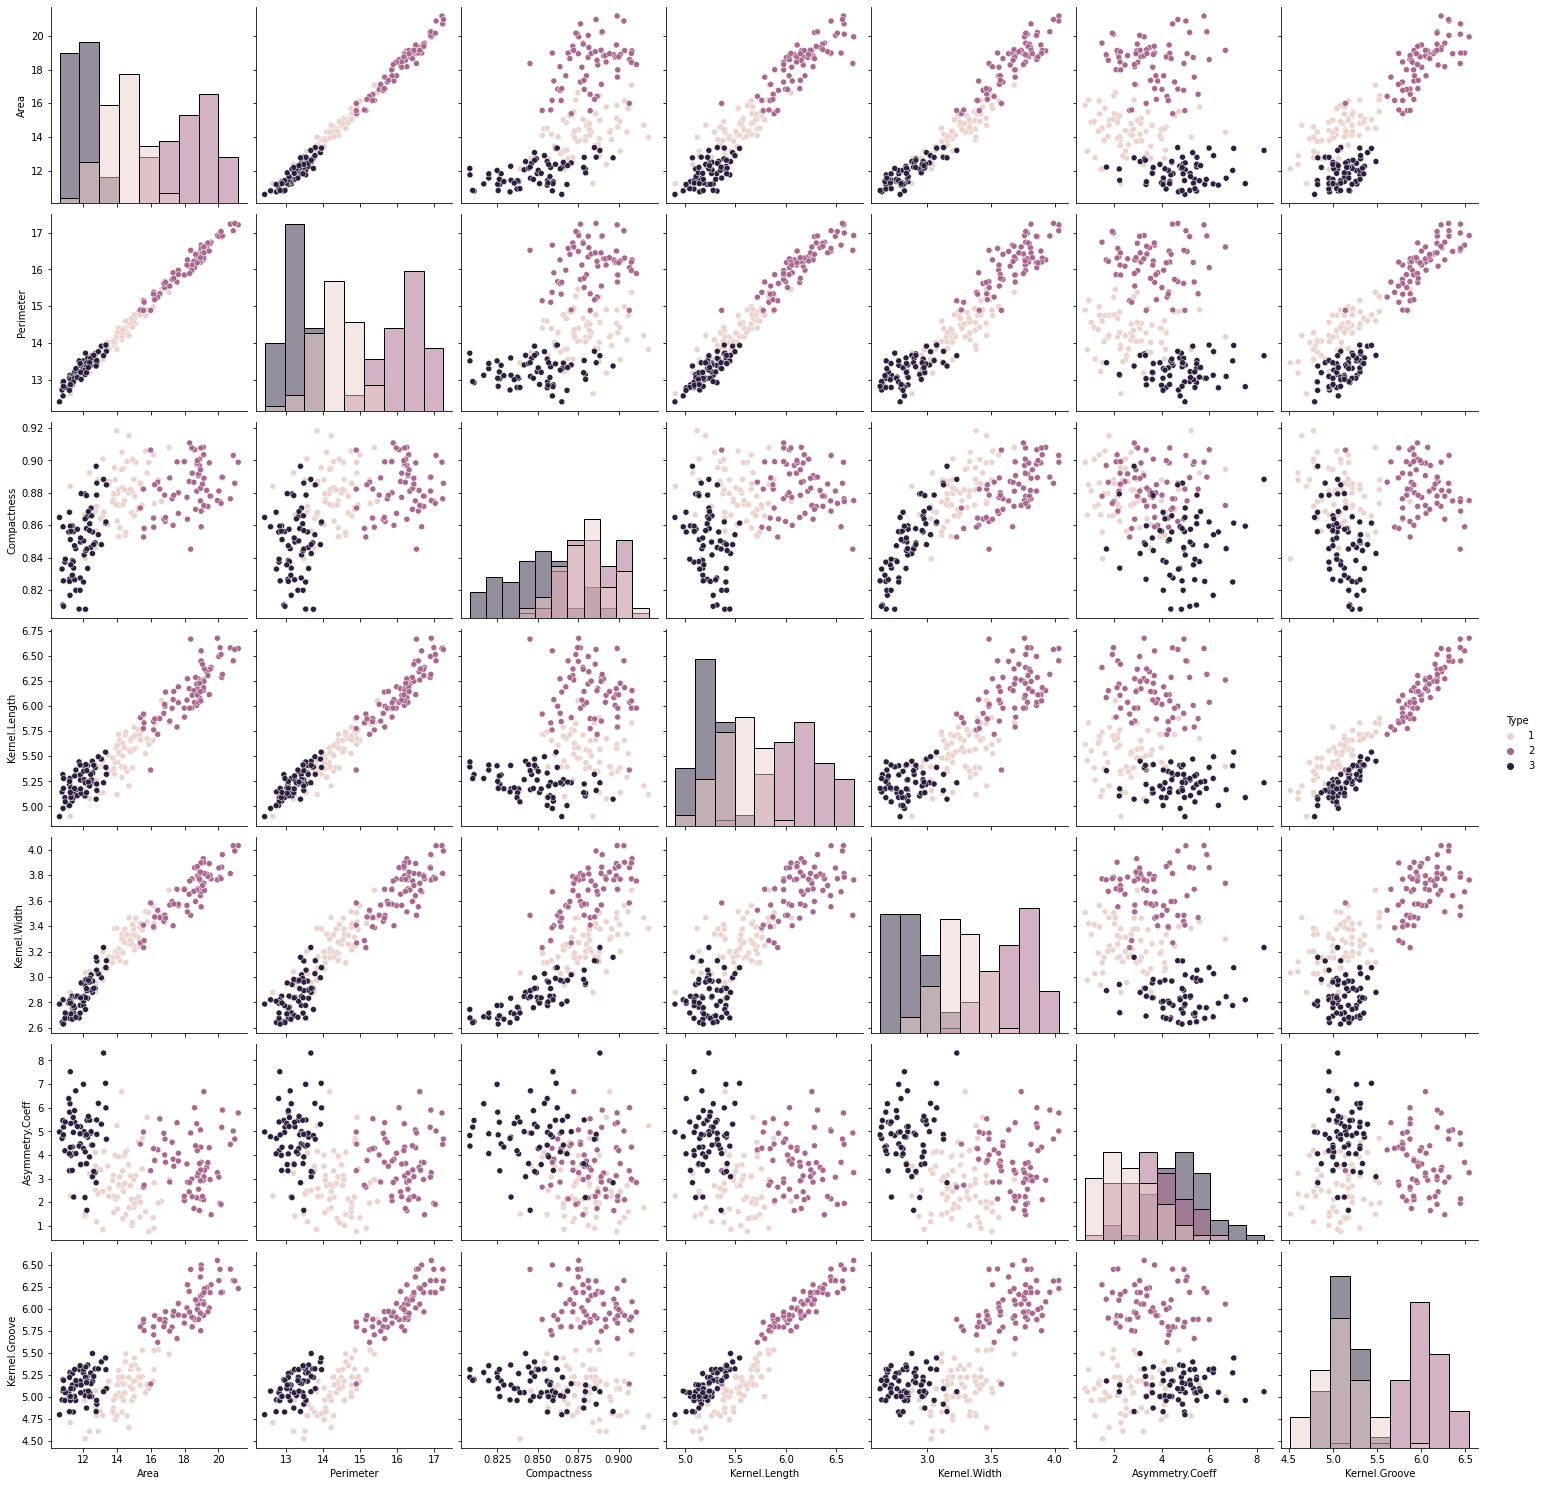

In [35]:
sns.pairplot(df, hue = 'Type', height = 3, diag_kind = 'hist')

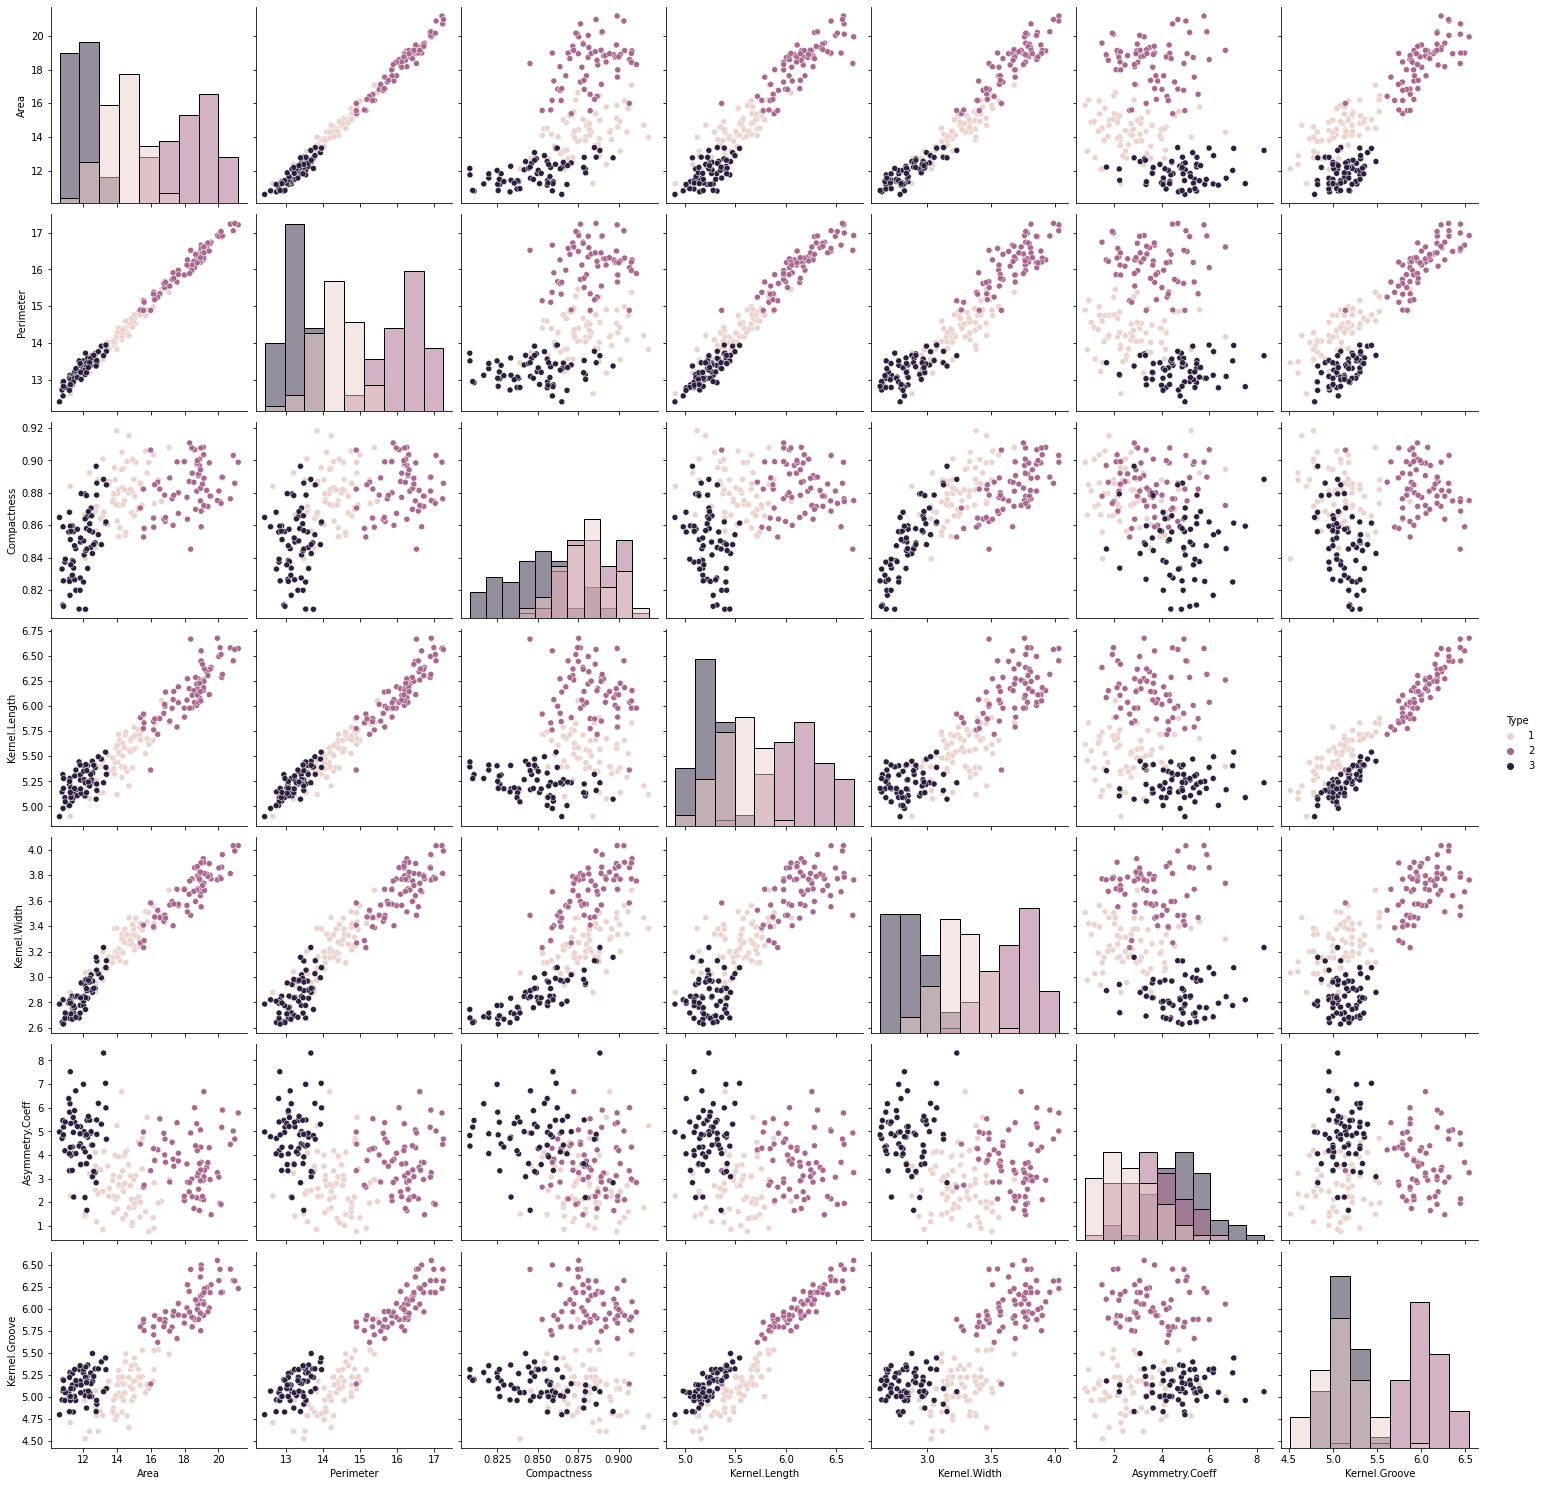

In [36]:
sns.pairplot(df, hue = 'Type', height = 3, diag_kind = 'hist')

# An Andrews curve to display separability of data according to Type.

## Inference:

1) Type 1 and 2 are getting overlapped, which is similar to what we found in the KDE.

2) The Hyper parameters given to training models should be mentioned very carefully as increasing redundant features results in the kind of overlapping as we see below and increases the complexity.

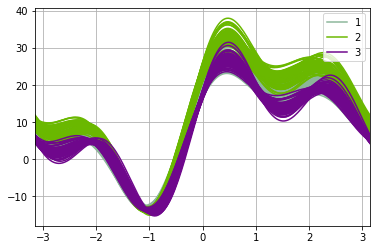

In [37]:
pd.plotting.andrews_curves(df, 'Type')

In [41]:
x1 = [2, 8, 10]
y1 = [11, 16, 9]
x2 = [2, 3, 6]
y2 = [4, 16, 9]

<BarContainer object of 3 artists>

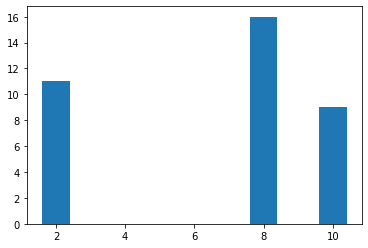

In [39]:
plt.bar(x1, y1)

<BarContainer object of 3 artists>

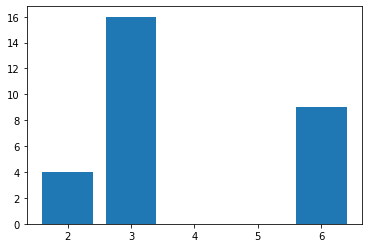

In [40]:
plt.bar(x2, y2)

# Conclusion:
After performing the experiment, I learnt the following:

i.	Read different types of data files (csv, excel, text file etc.).

ii.	Understand usage of different types of Python libraries for plotting data
.
iii.	Plotting of data using different types of plots.
